Final Result of Milestone 1:
 Data Collection, Exploration, and Preprocessing 

Data Overview:
    Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Data Types:
 Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: objec

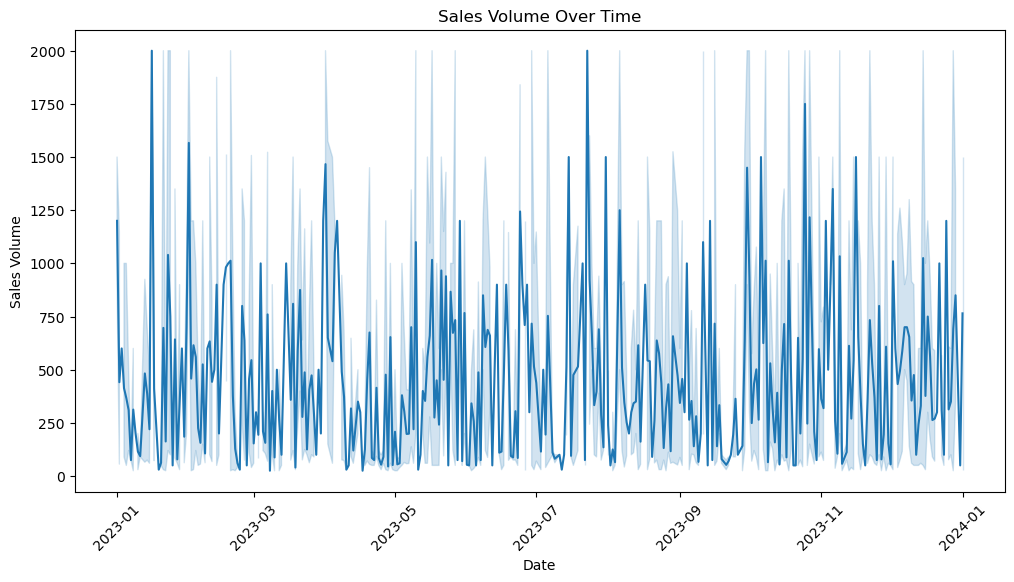

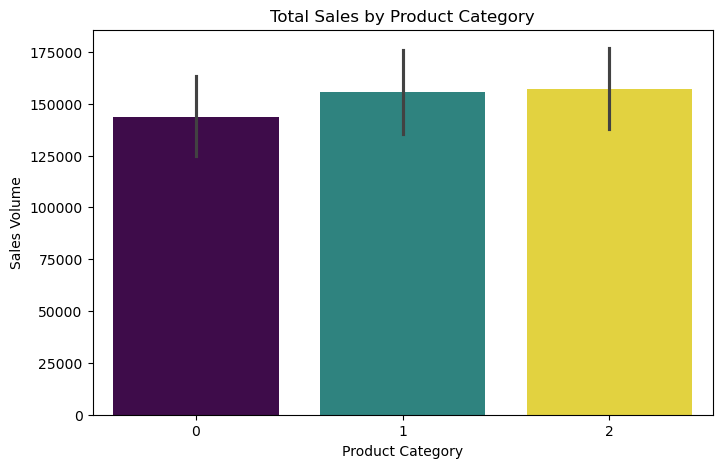

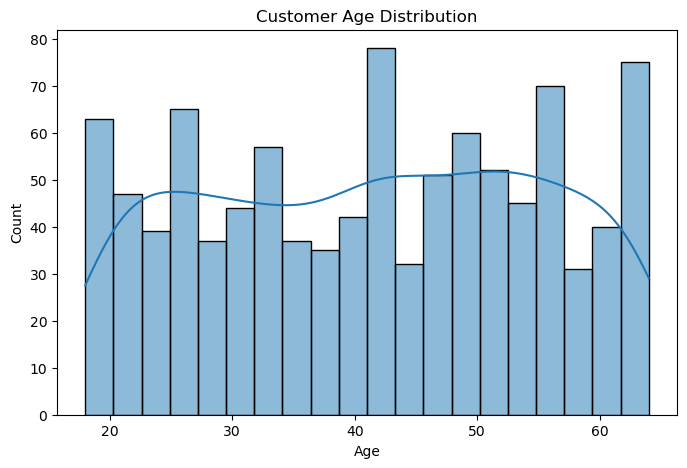

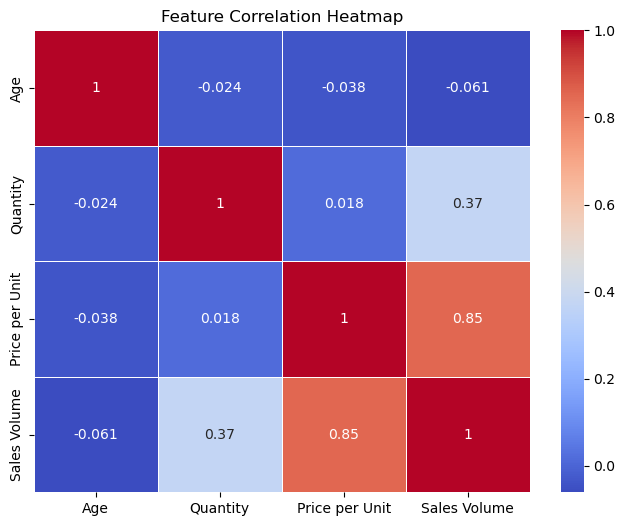


Final Processed Data Preview:
         Date  Gender  Age  Product Category  Quantity  Price per Unit  \
0 2023-11-24       1   34                 0         3              50   
1 2023-02-27       0   26                 1         2             500   
2 2023-01-13       1   50                 2         1              30   
3 2023-05-21       1   37                 1         1             500   
4 2023-05-06       1   30                 0         2              50   

   Total Amount  Sales Volume  
0           150           150  
1          1000          1000  
2            30            30  
3           500           500  
4           100           100  
✅ Processed dataset saved in 'data/processed_sales_data.csv'


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import os

# Load dataset
file_path = r"C:\Users\user\Downloads\archive\retail_sales_dataset.csv"
df = pd.read_csv(file_path)

# Ensure the data directory exists
os.makedirs("data", exist_ok=True)

# Display basic information
print("Data Overview:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Drop unnecessary columns
df.drop(columns=["Transaction ID", "Customer ID"], inplace=True)

# Encode categorical data
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Product Category'] = df['Product Category'].astype('category').cat.codes

# Create new feature: Sales Volume
df['Sales Volume'] = df['Quantity'] * df['Price per Unit']

# Outlier detection using Z-score
z_scores = np.abs(zscore(df[['Quantity', 'Price per Unit', 'Sales Volume']]))
df = df[(z_scores < 3).all(axis=1)]  # Remove outliers beyond 3 standard deviations

# Exploratory Visualizations
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Date'], y=df['Sales Volume'])
plt.title("Sales Volume Over Time")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=df['Product Category'], y=df['Sales Volume'], estimator=sum, hue=df['Product Category'], palette="viridis")
plt.title("Total Sales by Product Category")
plt.legend([],[], frameon=False)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Quantity', 'Price per Unit', 'Sales Volume']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Save processed dataset
df.to_csv("data/processed_sales_data.csv", index=False)

print("\nFinal Processed Data Preview:\n", df.head())
print("✅ Processed dataset saved in 'data/processed_sales_data.csv'")
